<a href="https://colab.research.google.com/github/farrelrassya/teachingMLDL/blob/main/01.%20Machine%20Learning/08.%20Week%208/Datasets/02_Polynomials_in_Play_Enhancing_SVM_with_Polynomial_Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.6 MB/s eta 0:00:00


Jumlah sampel: 569
Jumlah fitur: 30
Jumlah kelas: 2
Nama fitur: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Nama target: ['malignant' 'benign']


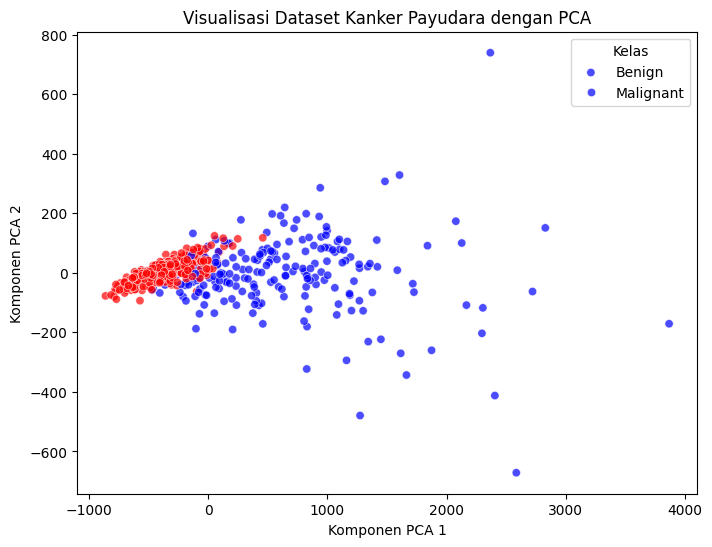

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets

# Memuat dataset Kanker Payudara
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Menampilkan informasi dataset
print(f"Jumlah sampel: {X.shape[0]}")
print(f"Jumlah fitur: {X.shape[1]}")
print(f"Jumlah kelas: {len(np.unique(y))}")
print(f"Nama fitur: {breast_cancer.feature_names}")
print(f"Nama target: {breast_cancer.target_names}")

# Visualisasi beberapa fitur menggunakan PCA untuk reduksi dimensi
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['blue', 'red'], alpha=0.7)
plt.xlabel("Komponen PCA 1")
plt.ylabel("Komponen PCA 2")
plt.title("Visualisasi Dataset Kanker Payudara dengan PCA")
plt.legend(title='Kelas', labels=['Benign', 'Malignant'])
plt.show()



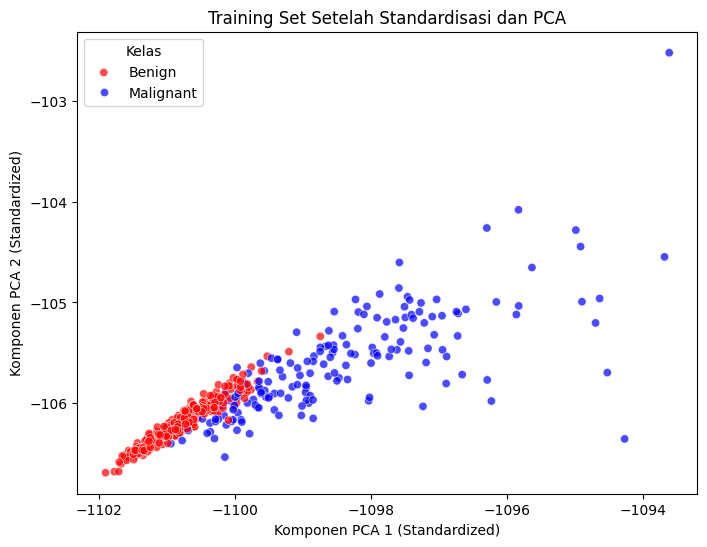

In [ ]:
# %%
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Membagi data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualisasi data yang telah di-standardisasi dengan PCA
X_train_pca = pca.transform(X_train_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette=['blue', 'red'], alpha=0.7)
plt.xlabel("Komponen PCA 1 (Standardized)")
plt.ylabel("Komponen PCA 2 (Standardized)")
plt.title("Training Set Setelah Standardisasi dan PCA")
plt.legend(title='Kelas', labels=['Benign', 'Malignant'])
plt.show()

In [ ]:
# %%
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid untuk C, degree, gamma, dan coef0
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'coef0': [0, 1, 10]
}

# Inisialisasi SVM dengan kernel polinomial
svc = svm.SVC(kernel='poly')

# Grid Search dengan cross-validation 5-fold
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Menampilkan hasil Grid Search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'coef0': 10, 'degree': 2, 'gamma': 'scale'}
Best cross-validation accuracy: 0.9780219780219781


Akurasi pada data testing: 0.98


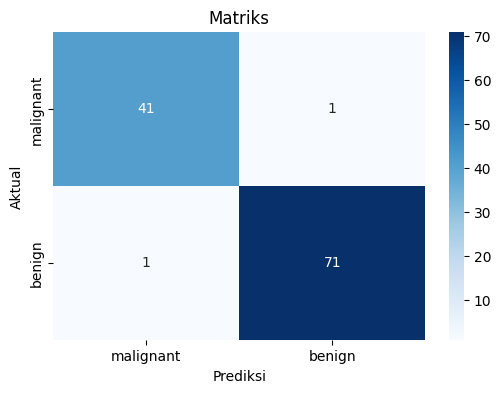

Laporan Klasifikasi:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# %%
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Menggunakan model terbaik dari Grid Search
best_clf = grid_search.best_estimator_

# Prediksi pada data testing
y_pred = best_clf.predict(X_test_scaled)

# Evaluasi performa
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada data testing: {accuracy:.2f}")

# Matriks kebingungan
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks")
plt.show()

# Laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))

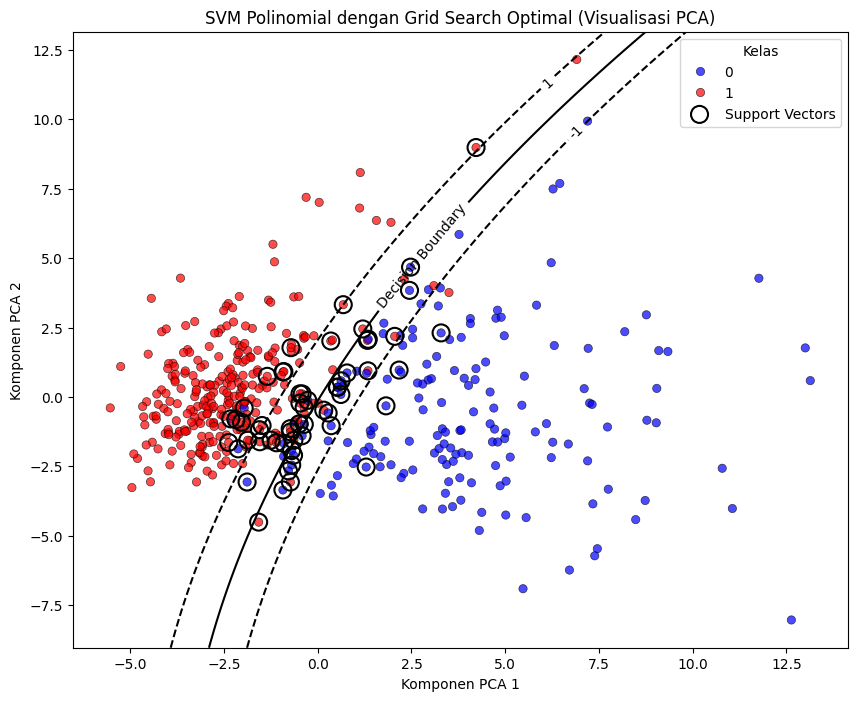

In [ ]:
# %%
from matplotlib.colors import ListedColormap

# Kita akan menggunakan dua fitur utama dari PCA untuk visualisasi
# Definisikan ulang PCA untuk dua komponen
pca_vis = PCA(n_components=2)
X_train_pca_vis = pca_vis.fit_transform(X_train_scaled)
X_test_pca_vis = pca_vis.transform(X_test_scaled)

# Melatih ulang model dengan dua komponen PCA
svc_pca = svm.SVC(kernel='poly', C=grid_search.best_params_['C'],
                 degree=grid_search.best_params_['degree'],
                 gamma=grid_search.best_params_['gamma'],
                 coef0=grid_search.best_params_['coef0'])
svc_pca.fit(X_train_pca_vis, y_train)

# Membuat grid untuk visualisasi decision boundary
xx, yy = np.meshgrid(np.linspace(X_train_pca_vis[:, 0].min()-1, X_train_pca_vis[:, 0].max()+1, 500),
                     np.linspace(X_train_pca_vis[:, 1].min()-1, X_train_pca_vis[:, 1].max()+1, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = svc_pca.decision_function(grid).reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 8))
# Plot decision boundary and margins
contour = plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.clabel(contour, fmt={-1: '-1', 0: 'Decision Boundary', 1: '1'}, inline=True, fontsize=10)

# Plot training points
sns.scatterplot(x=X_train_pca_vis[:, 0], y=X_train_pca_vis[:, 1], hue=y_train, palette=['blue', 'red'], alpha=0.7, edgecolor='k')

# Menandai support vectors
support_vectors_pca = pca_vis.transform(best_clf.support_vectors_)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=150, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

plt.xlabel("Komponen PCA 1")
plt.ylabel("Komponen PCA 2")
plt.title("SVM Polinomial dengan Grid Search Optimal (Visualisasi PCA)")
plt.legend(title='Kelas')
plt.show()